In [1]:
# DBSCAN
# Density Based
# 데이터가 위치하는 공간의 밀집도

In [2]:
# 고등학교 진학률 데이터.... 속성이 비슷한 중학교끼리 클러스터를 만든다

In [1]:
import numpy as np
import pandas as pd

In [9]:
# !conda install xlrd

^C


In [4]:
df = pd.read_excel('./2016_middle_shcool_graduates_report.xlsx'
                   ,header=0,engine='openpyxl')
df = df.iloc[:,1:]
df.head()

,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,과학고,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,0.018,0.007,0.000,0.011,0.227,0.000,0.004,0,0.000,37.594942,127.038909
1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,0,256,0.680,0.199,0.000,0.035,0.008,0.000,0.043,0.004,0.031,0,0.000,37.577473,127.003857
2,강남구,개원중학교,3,공립,주간,170,152,0.817,0.047,0.009,0.012,0.003,0.006,0.090,0.003,0.009,0,0.003,37.491637,127.071744
3,강남구,개포중학교,3,공립,주간,83,72,0.755,0.097,0.013,0.013,0.019,0.019,0.065,0.000,0.019,0,0.000,37.480439,127.062201
4,서초구,경원중학교,3,공립,주간,199,212,0.669,0.017,0.007,0.010,0.005,0.000,0.282,0.000,0.010,0,0.000,37.510750,127.008900


In [5]:
df.columns

Index(['지역', '학교명', '코드', '유형', '주야', '남학생수', '여학생수', '일반고', '특성화고', '과학고',
       '외고_국제고', '예고_체고', '마이스터고', '자사고', '자공고', '기타진학', '취업', '미상', '위도',
       '경도'],
      dtype='object')

In [6]:
# 지도위에 학교 위치를 시각화

In [7]:
import folium

In [11]:
# 위도경도 평균.... 
lat = df.loc[:,['위도','경도']].mean(axis = 0)[0]
lng = df.loc[:,['위도','경도']].mean(axis = 0)[1]

In [12]:
m =  folium.Map(location=[lat,lng],zoom_start=12)

In [17]:
for name, lat, lng in zip(df.학교명,df.위도,df.경도):
    folium.CircleMarker(
        [lat,lng],
        tooltip=name
    ).add_to(m)

In [18]:
m.save('school_location.html')

In [46]:
# 우리모델이 인식할수 없는 문자열데이터를 
# 원핫 인코딩 라벨 인코딩
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
ohe =  OneHotEncoder(sparse=False)
le = LabelEncoder()

testlist = ['성북구','종로구','구로구']
# testlist = [0,1,2]
a = ohe.fit_transform(np.array(testlist).reshape(-1, 1))
b = le.fit_transform(np.array(testlist).reshape(-1, 1))
a,b


C:\Users\user\miniconda3\envs\ai\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([[0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.]]),
 array([1, 2, 0], dtype=int64))

In [44]:
np.array(testlist).reshape(1, -1)

array([['성북구', '종로구', '구로구']], dtype='<U3')

In [49]:
new_df = df.iloc[:,5:16].copy()

In [50]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [56]:
ss = StandardScaler()
new_df_scaled = ss.fit_transform(new_df)

In [57]:
dbscan = DBSCAN()
dbscan.fit(new_df_scaled)

DBSCAN()

In [59]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a cluster. This is the most
 |      important DBSCAN parameter to choose appropriately for your data set
 |      and distance function.
 |  
 |  min_sam

In [60]:
import seaborn as sns

C:\Users\user\miniconda3\envs\ai\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\miniconda3\envs\ai\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\miniconda3\envs\ai\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\miniconda3\envs\ai\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\miniconda3\envs\ai\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\U

C:\Users\user\miniconda3\envs\ai\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\miniconda3\envs\ai\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\miniconda3\envs\ai\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\miniconda3\envs\ai\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\miniconda3\envs\ai\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\u

C:\Users\user\miniconda3\envs\ai\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\miniconda3\envs\ai\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\miniconda3\envs\ai\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\miniconda3\envs\ai\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\miniconda3\envs\ai\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\miniconda3\envs\ai\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51

C:\Users\user\miniconda3\envs\ai\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\miniconda3\envs\ai\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\miniconda3\envs\ai\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\miniconda3\envs\ai\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\miniconda3\envs\ai\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(byte

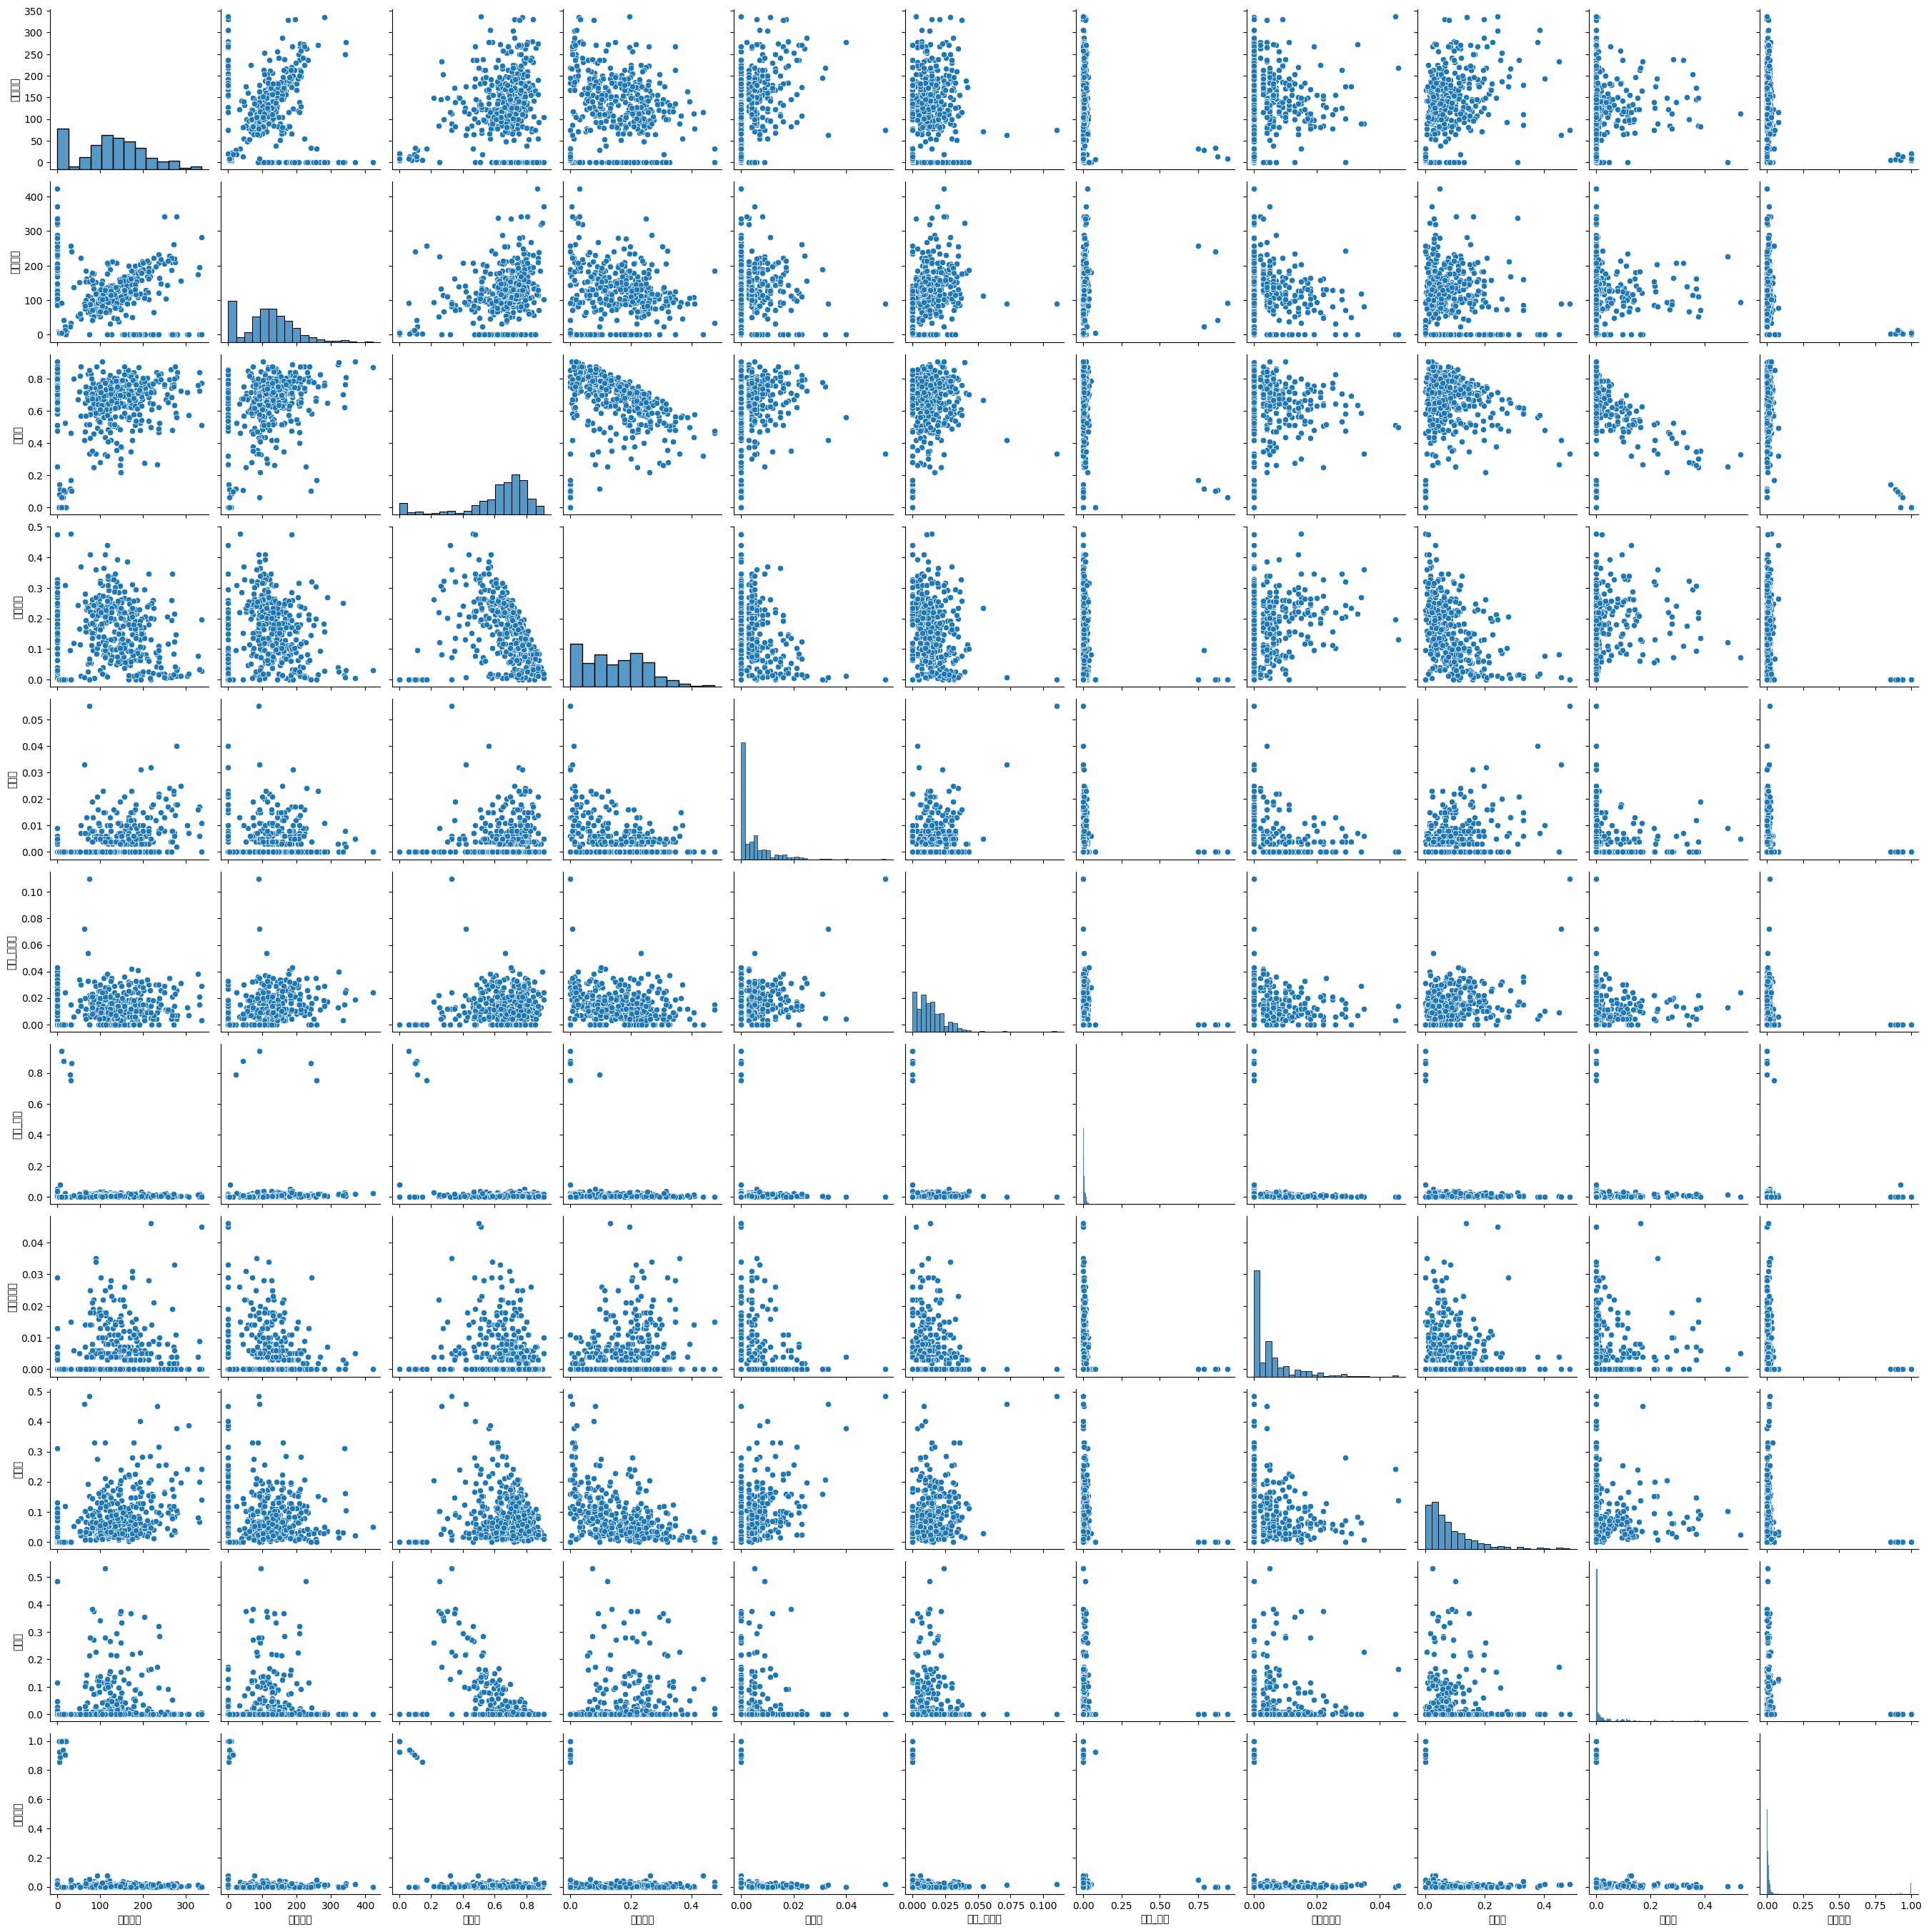

In [62]:
sns.pairplot(new_df)